# Install and Import Libraries

In [ ]:
# Install Data and Visualization Tools
!pip install pandas
!pip install yfinance
!pip install matplotlib
!pip install numpy
# Install Time Series Analysis and Machine Learning Libraries
!pip install scikit-learn
!pip install statsmodels
!pip install pmdarima
!pip install prophet

In [5]:
# Import Libraries
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.forecasting.theta import ThetaModel
import pmdarima as pm
from prophet import Prophet

# Get Data

In [6]:
# Get the list of stock tickers
tickers = ['WMT', 'TGT', 'COST', 'HD', 'DG', 'LOW', 'TJX']
data=yf.download(tickers, start = '2014-01-01', end = '2025-01-01')
data

C:\Users\leonh\AppData\Local\Temp\ipykernel_36776\1259727014.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(tickers, start = '2014-01-01', end = '2025-01-01')
[*********************100%***********************]  7 of 7 completed


Price            Close                                                 \
Ticker            COST         DG          HD         LOW         TGT   
Date                                                                    
2014-01-02   94.012108  53.548229   62.777813   40.045990   44.780437   
2014-01-03   93.597168  53.355736   62.678291   39.649090   45.000172   
2014-01-06   92.886940  52.157032   62.073624   39.090187   44.695381   
2014-01-07   92.456032  52.402012   62.379803   39.187401   44.589069   
2014-01-08   91.011612  52.235783   62.708897   39.325089   44.433144   
...                ...        ...         ...         ...         ...   
2024-12-24  955.192200  73.211266  391.210724  246.512604  128.404068   
2024-12-26  952.522278  74.182320  390.223175  245.734299  132.273636   
2024-12-27  936.144470  74.437340  387.971527  244.660446  131.410522   
2024-12-30  918.720764  74.241165  384.584198  243.074295  130.974106   
2024-12-31  912.803162  74.368683  384.149689  243.143280  131.100159   

Price                                    High                         ...  \
Ticker             TJX        WMT        COST         DG          HD  ...   
Date                                                                  ...   
2014-01-02   27.038040  20.899683   95.201129  53.915715   63.198783  ...   
2014-01-03   27.089142  20.830826   94.451025  54.046964   63.129878  ...   
2014-01-06   26.795252  20.714281   93.964236  53.661983   62.747176  ...   
2014-01-07   26.910257  20.777847   93.014628  52.865745   62.701268  ...   
2014-01-08   27.046549  20.613647   92.599625  52.550773   62.716552  ...   
...                ...        ...         ...        ...         ...  ...   
2024-12-24  122.330177  92.203255  955.750078  73.574186  391.210724  ...   
2024-12-26  123.835907  92.312691  955.779864  74.368685  390.855196  ...   
2024-12-27  122.775955  91.188515  946.853795  75.055278  390.549066  ...   
2024-12-30  119.952713  90.104111  930.635474  74.780633  386.342048  ...   
2024-12-31  119.675346  89.885246  921.241085  74.868923  386.588955  ...   

Price             Open                          Volume                     \
Ticker             TGT         TJX        WMT     COST       DG        HD   
Date                                                                        
2014-01-02   45.028508   26.986929  20.849360  1618400  6018200   4253400   
2014-01-03   45.092311   26.944326  20.873203  1293500  2697800   3897900   
2014-01-06   45.134821   27.182848  20.886437  2120200  4007800  11188800   
2014-01-07   44.674122   26.833590  20.703689  2292500  2584500   4630900   
2014-01-08   44.518199   26.952844  20.791102  4600000  4418700   4662300   
...                ...         ...        ...      ...      ...       ...   
2024-12-24  127.890065  120.844265  89.905140   939000  1542300   1392600   
2024-12-26  128.462254  122.290553  92.063977   969000  3600700   1319500   
2024-12-27  131.051694  122.756139  91.656091  1943400  2659700   1942700   
2024-12-30  130.343714  121.062197  90.263291  1881200  3775400   2444700   
2024-12-31  131.410508  120.745205  90.104116  1742900  3500400   2179700   

Price                                            
Ticker          LOW      TGT      TJX       WMT  
Date                                             
2014-01-02  5458300  7400100  4197000  20634000  
2014-01-03  4257500  4589400  3302600  14872200  
2014-01-06  4923000  4609600  6277000  21840600  
2014-01-07  5541900  5398300  6293800  15036900  
2014-01-08  4875800  5529900  6096000  17865600  
...             ...      ...      ...       ...  
2024-12-24   992100  1647700  1476100   8992400  
2024-12-26  1435200  5042000  2892800  10994000  
2024-12-27  1581100  3089000  3471500  11384400  
2024-12-30  1622800  3945600  3976600   9790200  
2024-12-31  1397900  2830200  3600100  11267700  

[2768 rows x 35 columns]

In [7]:
# Get the list of stock tickers
curr_data=yf.download(tickers, start = '2025-01-01', end = None)
curr_data

C:\Users\leonh\AppData\Local\Temp\ipykernel_36776\1274870986.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  curr_data=yf.download(tickers, start = '2025-01-01', end = None)
[*********************100%***********************]  7 of 7 completed


Price            Close                                                  \
Ticker            COST          DG          HD         LOW         TGT   
Date                                                                     
2025-01-02  906.367554   74.182312  383.626282  243.320602  133.049515   
2025-01-03  913.112000   73.240685  384.337311  244.798370  131.691742   
2025-01-06  919.218750   74.398102  384.524963  246.039719  135.086136   
2025-01-07  917.883850   73.320587  379.448914  242.916687  135.047333   
2025-01-08  923.861145   70.799797  382.381958  243.231934  134.048431   
...                ...         ...         ...         ...         ...   
2025-08-11  988.739990  114.550003  387.529999  239.850006  102.894142   
2025-08-12  991.250000  115.190002  396.000000  244.869995  105.120003   
2025-08-13  978.849976  115.790001  407.179993  256.329987  105.360001   
2025-08-14  975.390015  114.699997  400.320007  253.050003  104.250000   
2025-08-15  970.979980  112.470001  398.089996  251.199997  103.095001   

Price                                     High                          ...  \
Ticker             TJX         WMT        COST          DG          HD  ...   
Date                                                                    ...   
2025-01-02  120.012154   89.537041  922.267188   76.546184  387.783917  ...   
2025-01-03  119.596100   90.313026  920.713135   74.456954  386.144556  ...   
2025-01-06  119.744690   90.959686  923.900918   75.967474  389.087471  ...   
2025-01-07  119.011642   90.342873  927.786243   77.106727  387.023456  ...   
2025-01-08  120.507462   91.327789  926.979307   73.152538  382.865851  ...   
...                ...         ...         ...         ...         ...  ...   
2025-08-11  131.980377  103.930000  989.580017  117.480003  391.519989  ...   
2025-08-12  132.967239  103.620003  991.750000  116.279999  396.380005  ...   
2025-08-13  133.675003  100.989998  986.400024  116.300003  407.820007  ...   
2025-08-14  132.949997  100.849998  988.289978  115.650002  403.609985  ...   
2025-08-15  132.729996  100.025002  979.999878  114.680000  402.786499  ...   

Price             Open                           Volume                    \
Ticker             TGT         TJX         WMT     COST       DG       HD   
Date                                                                        
2025-01-02  131.652973  120.566892   89.517147  1765100  2673700  2415700   
2025-01-03  133.534407  120.408398   89.686270  1612200  3120000  2231600   
2025-01-06  132.884657  119.606005   90.362774  1970400  3234400  3274500   
2025-01-07  135.706803  119.952717   91.228294  1888000  3592200  2274300   
2025-01-08  134.804889  119.041358   90.641336  1774800  5786100  2848500   
...                ...         ...         ...      ...      ...      ...   
2025-08-11  104.269229  131.372310  103.900002  2290100  2695900  2605800   
2025-08-12  103.774593  132.389076  104.250000  1588500  2277300  2911300   
2025-08-13  103.809998  132.927380  102.150002  2352600  3874900  5187500   
2025-08-14  103.849998  133.020004  101.220001  1807400  1752700  3599600   
2025-08-15  102.300003  133.130005  100.629997   935104  1021208  2039448   

Price                                            
Ticker          LOW      TGT      TJX       WMT  
Date                                             
2025-01-02  2741000  4358300  3424400  14820400  
2025-01-03  1889200  4025200  3897200  10834600  
2025-01-06  2573400  4937900  5963400  14519900  
2025-01-07  1803500  4166100  4500100  11238000  
2025-01-08  2364900  4663400  5219200  13453600  
...             ...      ...      ...       ...  
2025-08-11  2689500  5020200  3304200  12856700  
2025-08-12  2973200  6593800  4284500  17915300  
2025-08-13  6030300  7364700  5593800  19398500  
2025-08-14  3635000  4985000  3763200  10851800  
2025-08-15  1340504  3771649  2206820   6768120  

[155 rows x 35 columns]

In [8]:
monthly_data=data['Close'].asfreq('ME', method='pad')
wmt_data=monthly_data['WMT']
tgt_data=monthly_data['TGT']
cost_data=monthly_data['COST']
hd_data=monthly_data['HD']
dg_data=monthly_data['DG']
low_data=monthly_data['LOW']
tjx_data=monthly_data['TJX']

In [9]:
curr_monthly_data=curr_data['Close'].asfreq('ME', method='pad')
curr_wmt_data=curr_monthly_data['WMT']
curr_tgt_data=curr_monthly_data['TGT']
curr_cost_data=curr_monthly_data['COST']
curr_hd_data=curr_monthly_data['HD']
curr_dg_data=curr_monthly_data['DG']
curr_low_data=curr_monthly_data['LOW']
curr_tjx_data=curr_monthly_data['TJX']

# Plot Current Data

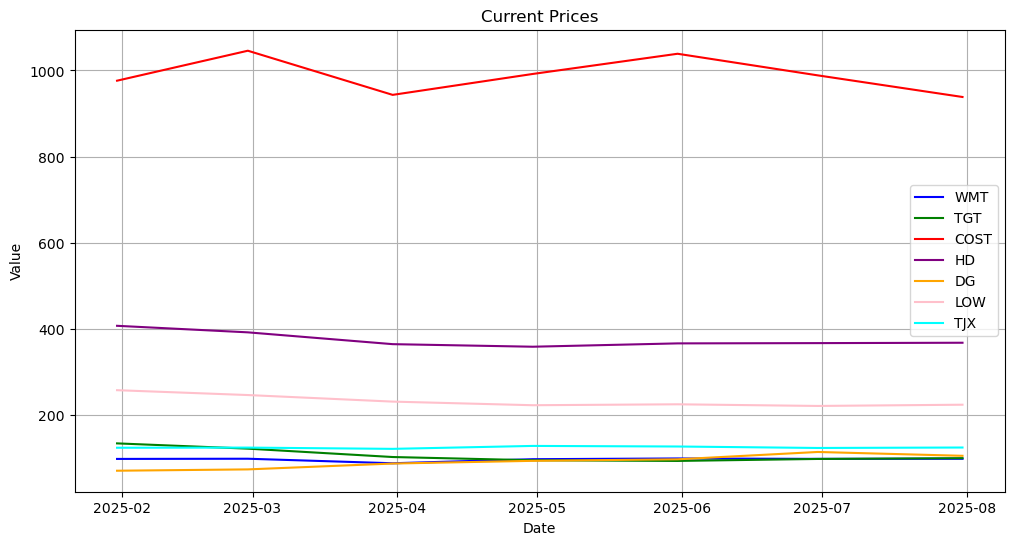

In [10]:
plt.figure(figsize=(12, 6))
plt.title('Current Prices')    
plt.xlabel('Date')
plt.ylabel('Value')
colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'cyan', 'magenta']
for i, ticker in enumerate(tickers):
    plt.plot(curr_monthly_data.index, curr_monthly_data[ticker], color=colors[i], label=ticker)
plt.legend()
plt.grid(True)

# Method 1: Manual ARIMA Model

In [11]:
def method1(data):
    model = ARIMA(data, order=(1,1,1))
    results = model.fit()
    forecast = results.forecast(steps=5)
    return forecast

In [12]:
def custom_method1(data, order_tuple):
    model = ARIMA(data, order=order_tuple)
    results = model.fit()
    forecast = results.forecast(steps=5)
    return forecast

In [13]:
m1_wmt_forecast = method1(wmt_data)
m1_wmt_forecast, curr_wmt_data.head()

C:\Users\leonh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\leonh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2025-01-31    91.711918
 2025-02-28    93.516935
 2025-03-31    95.300553
 2025-04-30    97.063025
 2025-05-31    98.804604
 Freq: ME, Name: predicted_mean, dtype: float64,
 Date
 2025-01-31    97.655075
 2025-02-28    98.102760
 2025-03-31    87.578255
 2025-04-30    97.015434
 2025-05-31    98.720001
 Freq: ME, Name: WMT, dtype: float64)

In [14]:
m1_tgt_forecast = method1(tgt_data)
m1_tgt_forecast, curr_tgt_data.head()

C:\Users\leonh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\leonh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2025-01-31    128.528298
 2025-02-28    130.482783
 2025-03-31    128.997472
 2025-04-30    130.126234
 2025-05-31    129.268432
 Freq: ME, Name: predicted_mean, dtype: float64,
 Date
 2025-01-31    133.747787
 2025-02-28    121.517899
 2025-03-31    102.073471
 2025-04-30     94.581299
 2025-05-31     93.001427
 Freq: ME, Name: TGT, dtype: float64)

In [15]:
m1_cost_forecast = method1(cost_data)
m1_hd_forecast = method1(hd_data)
m1_dg_forecast = method1(dg_data)
m1_low_forecast = method1(low_data)
m1_tjx_forecast = method1(tjx_data)

C:\Users\leonh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\leonh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\leonh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\leonh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\leonh\anaconda3\Lib\s

# Method 2: Auto ARIMA Model

In [16]:
def optimal_order(data):
    optimal_model = pm.auto_arima(data, start_p=0, start_q=0, seasonal=False, stepwise=False, suppress_warnings=True, error_action='ignore')
    return optimal_model.order
def seasonal_optimal(data):
    optimal_model = pm.auto_arima(data, start_p=0, start_q=0, seasonal=True, stepwise=False, suppress_warnings=True, error_action='ignore')
    return optimal_model.order

In [17]:
def method2(data):
    model = ARIMA(data, order=optimal_order(data))
    results=model.fit()
    forecast=results.forecast(steps=5)
    return forecast

In [18]:
m2_wmt_forecast = method2(wmt_data)
m2_wmt_forecast, curr_wmt_data.head()

C:\Users\leonh\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2025-01-31     92.652251
 2025-02-28     94.386517
 2025-03-31     96.392568
 2025-04-30     99.330780
 2025-05-31    102.079743
 Freq: ME, Name: predicted_mean, dtype: float64,
 Date
 2025-01-31    97.655075
 2025-02-28    98.102760
 2025-03-31    87.578255
 2025-04-30    97.015434
 2025-05-31    98.720001
 Freq: ME, Name: WMT, dtype: float64)

In [19]:
m2_tgt_forecast = method2(tgt_data)
m2_tgt_forecast, curr_tgt_data.head()

(2025-01-31    136.023339
 2025-02-28    131.400150
 2025-03-31    128.265258
 2025-04-30    128.428658
 2025-05-31    128.428658
 Freq: ME, Name: predicted_mean, dtype: float64,
 Date
 2025-01-31    133.747787
 2025-02-28    121.517899
 2025-03-31    102.073471
 2025-04-30     94.581299
 2025-05-31     93.001427
 Freq: ME, Name: TGT, dtype: float64)

In [20]:
m2_cost_forecast = method2(cost_data)
m2_cost_forecast, curr_cost_data.head()

(2025-01-31     924.589363
 2025-02-28     976.936760
 2025-03-31     987.568203
 2025-04-30     995.754415
 2025-05-31    1022.031783
 Freq: ME, Name: predicted_mean, dtype: float64,
 Date
 2025-01-31     976.172485
 2025-02-28    1045.796631
 2025-03-31     943.242615
 2025-04-30     991.831848
 2025-05-31    1038.740967
 Freq: ME, Name: COST, dtype: float64)

In [21]:
m2_hd_forecast = method2(hd_data)
m2_hd_forecast, curr_hd_data.head()

(2025-01-31    381.508618
 2025-02-28    369.249275
 2025-03-31    378.973052
 2025-04-30    373.230879
 2025-05-31    382.870581
 Freq: ME, Name: predicted_mean, dtype: float64,
 Date
 2025-01-31    406.853638
 2025-02-28    391.665009
 2025-03-31    364.226471
 2025-04-30    358.263550
 2025-05-31    366.015381
 Freq: ME, Name: HD, dtype: float64)

In [22]:
m2_dg_forecast = method2(dg_data)
m2_dg_forecast, curr_dg_data.head()

(2025-01-31    77.105213
 2025-02-28    80.473094
 2025-03-31    78.541943
 2025-04-30    75.932605
 2025-05-31    77.898543
 Freq: ME, Name: predicted_mean, dtype: float64,
 Date
 2025-01-31    70.246201
 2025-02-28    73.330475
 2025-03-31    86.923004
 2025-04-30    93.214706
 2025-05-31    96.756645
 Freq: ME, Name: DG, dtype: float64)

In [23]:
m2_low_forecast = method2(low_data)
m2_low_forecast, curr_low_data.head()

(2025-01-31    236.447620
 2025-02-28    232.457471
 2025-03-31    234.141183
 2025-04-30    240.470553
 2025-05-31    247.971147
 Freq: ME, Name: predicted_mean, dtype: float64,
 Date
 2025-01-31    257.306488
 2025-02-28    246.026291
 2025-03-31    230.778290
 2025-04-30    222.377289
 2025-05-31    224.535812
 Freq: ME, Name: LOW, dtype: float64)

In [24]:
m2_tjx_forecast = method2(tjx_data)
m2_tjx_forecast, curr_tjx_data.head()

(2025-01-31    119.675346
 2025-02-28    119.675346
 2025-03-31    119.675346
 2025-04-30    119.675346
 2025-05-31    119.675346
 Freq: ME, Name: predicted_mean, dtype: float64,
 Date
 2025-01-31    123.617966
 2025-02-28    123.961899
 2025-03-31    121.020836
 2025-04-30    127.856812
 2025-05-31    126.497818
 Freq: ME, Name: TJX, dtype: float64)

In [25]:
def seasonal_method2(data):
    model = ARIMA(data, order=seasonal_optimal(data))
    results=model.fit()
    forecast=results.forecast(steps=5)
    return forecast

In [26]:
sm2_wmt_forecast = seasonal_method2(wmt_data)
sm2_tgt_forecast = seasonal_method2(tgt_data)
sm2_cost_forecast = seasonal_method2(cost_data)
sm2_hd_forecast = seasonal_method2(hd_data)
sm2_dg_forecast = seasonal_method2(dg_data)
sm2_low_forecast = seasonal_method2(low_data)
sm2_tjx_forecast = seasonal_method2(tjx_data)

# Method 3: Exponential Smoothing 

In [27]:
def method3(data):
    model = ExponentialSmoothing(data, trend='add', seasonal=None).fit()
    forecast = model.forecast(5)
    return forecast
def sea_method3(data):
    model = ExponentialSmoothing(data, trend='add', seasonal='add',seasonal_periods=12).fit()
    forecast = model.forecast(5)
    return forecast

In [28]:
m3_wmt_forecast = method3(wmt_data)
m3_wmt_forecast, curr_wmt_data.head()

(2025-01-31     93.544724
 2025-02-28     96.460208
 2025-03-31     99.375692
 2025-04-30    102.291176
 2025-05-31    105.206660
 Freq: ME, dtype: float64,
 Date
 2025-01-31    97.655075
 2025-02-28    98.102760
 2025-03-31    87.578255
 2025-04-30    97.015434
 2025-05-31    98.720001
 Freq: ME, Name: WMT, dtype: float64)

In [29]:
m3_tgt_forecast = method3(tgt_data)
m3_tgt_forecast, curr_tgt_data.head()

(2025-01-31    131.787880
 2025-02-28    132.480246
 2025-03-31    133.172612
 2025-04-30    133.864978
 2025-05-31    134.557344
 Freq: ME, dtype: float64,
 Date
 2025-01-31    133.747787
 2025-02-28    121.517899
 2025-03-31    102.073471
 2025-04-30     94.581299
 2025-05-31     93.001427
 Freq: ME, Name: TGT, dtype: float64)

In [30]:
m3_cost_forecast = method3(cost_data)
m3_cost_forecast, curr_cost_data.head()

(2025-01-31     948.315882
 2025-02-28     966.770235
 2025-03-31     985.224588
 2025-04-30    1003.678942
 2025-05-31    1022.133295
 Freq: ME, dtype: float64,
 Date
 2025-01-31     976.172485
 2025-02-28    1045.796631
 2025-03-31     943.242615
 2025-04-30     991.831848
 2025-05-31    1038.740967
 Freq: ME, Name: COST, dtype: float64)

In [31]:
m3_hd_forecast = method3(hd_data)
m3_hd_forecast, curr_hd_data.head()

(2025-01-31    386.648839
 2025-02-28    389.147989
 2025-03-31    391.647139
 2025-04-30    394.146289
 2025-05-31    396.645439
 Freq: ME, dtype: float64,
 Date
 2025-01-31    406.853638
 2025-02-28    391.665009
 2025-03-31    364.226471
 2025-04-30    358.263550
 2025-05-31    366.015381
 Freq: ME, Name: HD, dtype: float64)

In [32]:
m3_dg_forecast = method3(dg_data)
m3_dg_forecast, curr_dg_data.head()

(2025-01-31    70.747756
 2025-02-28    67.126829
 2025-03-31    63.505902
 2025-04-30    59.884975
 2025-05-31    56.264048
 Freq: ME, dtype: float64,
 Date
 2025-01-31    70.246201
 2025-02-28    73.330475
 2025-03-31    86.923004
 2025-04-30    93.214706
 2025-05-31    96.756645
 Freq: ME, Name: DG, dtype: float64)

In [33]:
m3_low_forecast = method3(low_data)
m3_low_forecast, curr_low_data.head()

(2025-01-31    244.709410
 2025-02-28    246.275539
 2025-03-31    247.841669
 2025-04-30    249.407798
 2025-05-31    250.973928
 Freq: ME, dtype: float64,
 Date
 2025-01-31    257.306488
 2025-02-28    246.026291
 2025-03-31    230.778290
 2025-04-30    222.377289
 2025-05-31    224.535812
 Freq: ME, Name: LOW, dtype: float64)

In [34]:
m3_tjx_forecast = method3(tjx_data)
m3_tjx_forecast, curr_tjx_data.head()

(2025-01-31    120.922263
 2025-02-28    121.652395
 2025-03-31    122.382526
 2025-04-30    123.112658
 2025-05-31    123.842789
 Freq: ME, dtype: float64,
 Date
 2025-01-31    123.617966
 2025-02-28    123.961899
 2025-03-31    121.020836
 2025-04-30    127.856812
 2025-05-31    126.497818
 Freq: ME, Name: TJX, dtype: float64)

In [35]:
sm3_wmt_forecast = sea_method3(wmt_data)
sm3_tgt_forecast = sea_method3(tgt_data)
sm3_cost_forecast = sea_method3(cost_data)
sm3_hd_forecast = sea_method3(hd_data)
sm3_dg_forecast = sea_method3(dg_data)
sm3_low_forecast = sea_method3(low_data)
sm3_tjx_forecast = sea_method3(tjx_data)

# Method 4: Facebook Prophet

In [36]:
def method4(data):
    df = data.reset_index()
    df.columns = ['ds', 'y']
    df['ds'] = pd.to_datetime(df['ds'])
    model = Prophet(
        daily_seasonality=False,
        yearly_seasonality=False,
        weekly_seasonality=False
    )
    model.fit(df)
    future = model.make_future_dataframe(periods=5, freq='M')
    forecast = model.predict(future)    
    result = pd.Series(
        data=forecast['yhat'].tail(5).values,
        index=forecast['ds'].tail(5).values
    )
    return result

In [37]:
m4_wmt_forecast = method4(wmt_data)
m4_wmt_forecast, curr_wmt_data.head()

13:51:21 - cmdstanpy - INFO - Chain [1] start processing
13:51:22 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\leonh\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


(2025-01-31    72.636768
 2025-02-28    73.458745
 2025-03-31    74.368791
 2025-04-30    75.249481
 2025-05-31    76.159527
 dtype: float64,
 Date
 2025-01-31    97.655075
 2025-02-28    98.102760
 2025-03-31    87.578255
 2025-04-30    97.015434
 2025-05-31    98.720001
 Freq: ME, Name: WMT, dtype: float64)

In [38]:
m4_tgt_forecast = method4(tgt_data)
m4_tgt_forecast, curr_tgt_data.head()

13:51:22 - cmdstanpy - INFO - Chain [1] start processing
13:51:22 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\leonh\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


(2025-01-31    169.563402
 2025-02-28    170.442869
 2025-03-31    171.416565
 2025-04-30    172.358851
 2025-05-31    173.332546
 dtype: float64,
 Date
 2025-01-31    133.747787
 2025-02-28    121.517899
 2025-03-31    102.073471
 2025-04-30     94.581299
 2025-05-31     93.001427
 Freq: ME, Name: TGT, dtype: float64)

In [39]:
m4_cost_forecast = method4(cost_data)
m4_cost_forecast, curr_cost_data.head()

13:51:23 - cmdstanpy - INFO - Chain [1] start processing
13:51:23 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\leonh\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


(2025-01-31    849.915235
 2025-02-28    861.768999
 2025-03-31    874.892810
 2025-04-30    887.593273
 2025-05-31    900.717084
 dtype: float64,
 Date
 2025-01-31     976.172485
 2025-02-28    1045.796631
 2025-03-31     943.242615
 2025-04-30     991.831848
 2025-05-31    1038.740967
 Freq: ME, Name: COST, dtype: float64)

In [40]:
m4_hd_forecast = method4(hd_data)
m4_hd_forecast, curr_hd_data.head()

13:51:24 - cmdstanpy - INFO - Chain [1] start processing
13:51:24 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\leonh\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


(2025-01-31    371.618041
 2025-02-28    374.097729
 2025-03-31    376.843098
 2025-04-30    379.499907
 2025-05-31    382.245276
 dtype: float64,
 Date
 2025-01-31    406.853638
 2025-02-28    391.665009
 2025-03-31    364.226471
 2025-04-30    358.263550
 2025-05-31    366.015381
 Freq: ME, Name: HD, dtype: float64)

In [41]:
m4_dg_forecast = method4(dg_data)
m4_dg_forecast, curr_dg_data.head()

13:51:24 - cmdstanpy - INFO - Chain [1] start processing
13:51:24 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\leonh\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


(2025-01-31    86.569090
 2025-02-28    82.618543
 2025-03-31    78.244723
 2025-04-30    74.011994
 2025-05-31    69.638174
 dtype: float64,
 Date
 2025-01-31    70.246201
 2025-02-28    73.330475
 2025-03-31    86.923004
 2025-04-30    93.214706
 2025-05-31    96.756645
 Freq: ME, Name: DG, dtype: float64)

In [42]:
m4_low_forecast = method4(low_data)
m4_low_forecast, curr_low_data.head()

13:51:25 - cmdstanpy - INFO - Chain [1] start processing
13:51:25 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\leonh\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


(2025-01-31    252.377375
 2025-02-28    254.357194
 2025-03-31    256.549136
 2025-04-30    258.670370
 2025-05-31    260.862313
 dtype: float64,
 Date
 2025-01-31    257.306488
 2025-02-28    246.026291
 2025-03-31    230.778290
 2025-04-30    222.377289
 2025-05-31    224.535812
 Freq: ME, Name: LOW, dtype: float64)

In [43]:
m4_tjx_forecast = method4(tjx_data)
m4_tjx_forecast, curr_tjx_data.head()

13:51:26 - cmdstanpy - INFO - Chain [1] start processing
13:51:26 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\leonh\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


(2025-01-31    116.011800
 2025-02-28    117.562797
 2025-03-31    119.279972
 2025-04-30    120.941754
 2025-05-31    122.658929
 dtype: float64,
 Date
 2025-01-31    123.617966
 2025-02-28    123.961899
 2025-03-31    121.020836
 2025-04-30    127.856812
 2025-05-31    126.497818
 Freq: ME, Name: TJX, dtype: float64)

In [44]:
def sea_method4(data):
    df = data.reset_index()
    df.columns = ['ds', 'y']
    df['ds'] = pd.to_datetime(df['ds'])
    model = Prophet(
        daily_seasonality=False,
        yearly_seasonality=True,
        weekly_seasonality=False
    )
    model.fit(df)
    future = model.make_future_dataframe(periods=5, freq='M')
    forecast = model.predict(future)    
    result = pd.Series(
        data=forecast['yhat'].tail(5).values,
        index=forecast['ds'].tail(5).values
    )
    return result

In [45]:
sm4_wmt_forecast = sea_method4(wmt_data)
sm4_tgt_forecast = sea_method4(tgt_data)
sm4_cost_forecast = sea_method4(cost_data)
sm4_hd_forecast = sea_method4(hd_data)
sm4_dg_forecast = sea_method4(dg_data)
sm4_low_forecast = sea_method4(low_data)
sm4_tjx_forecast = sea_method4(tjx_data)

13:51:28 - cmdstanpy - INFO - Chain [1] start processing
13:51:28 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\leonh\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
13:51:28 - cmdstanpy - INFO - Chain [1] start processing
13:51:28 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\leonh\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
13:51:28 - cmdstanpy - INFO - Chain [1] start processing
13:51:28 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\leonh\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
13:51:28 - cmdstanpy - INFO - Chain [1] start processing
13:51:28 - cmdstanp

# Method 5: Theta Model

In [46]:
def method5(data):
    model = ThetaModel(data)
    fit = model.fit()
    fc = fit.forecast(5)
    return fc

In [47]:
m5_wmt_forecast = method5(wmt_data)
m5_wmt_forecast, curr_wmt_data.head()

(2025-01-31    90.145246
 2025-02-28    87.332032
 2025-03-31    89.236851
 2025-04-30    89.682185
 2025-05-31    88.407505
 Freq: ME, Name: forecast, dtype: float64,
 Date
 2025-01-31    97.655075
 2025-02-28    98.102760
 2025-03-31    87.578255
 2025-04-30    97.015434
 2025-05-31    98.720001
 Freq: ME, Name: WMT, dtype: float64)

In [48]:
m5_tgt_forecast = method5(tgt_data)
m5_tgt_forecast, curr_tgt_data.head()

(2025-01-31    130.627771
 2025-02-28    130.110144
 2025-03-31    132.858845
 2025-04-30    132.844856
 2025-05-31    126.821228
 Freq: ME, Name: forecast, dtype: float64,
 Date
 2025-01-31    133.747787
 2025-02-28    121.517899
 2025-03-31    102.073471
 2025-04-30     94.581299
 2025-05-31     93.001427
 Freq: ME, Name: TGT, dtype: float64)

In [49]:
m5_cost_forecast = method5(cost_data)
m5_cost_forecast, curr_cost_data.head()

(2025-01-31    905.939004
 2025-02-28    897.368985
 2025-03-31    910.550633
 2025-04-30    900.269260
 2025-05-31    894.925651
 Freq: ME, Name: forecast, dtype: float64,
 Date
 2025-01-31     976.172485
 2025-02-28    1045.796631
 2025-03-31     943.242615
 2025-04-30     991.831848
 2025-05-31    1038.740967
 Freq: ME, Name: COST, dtype: float64)

In [50]:
m5_hd_forecast = method5(hd_data)
m5_hd_forecast, curr_hd_data.head()

(2025-01-31    382.235964
 2025-02-28    370.348513
 2025-03-31    371.086165
 2025-04-30    373.867023
 2025-05-31    371.189108
 Freq: ME, Name: forecast, dtype: float64,
 Date
 2025-01-31    406.853638
 2025-02-28    391.665009
 2025-03-31    364.226471
 2025-04-30    358.263550
 2025-05-31    366.015381
 Freq: ME, Name: HD, dtype: float64)

In [51]:
m5_dg_forecast = method5(dg_data)
m5_dg_forecast, curr_dg_data.head()

(2025-01-31    73.475546
 2025-02-28    73.020567
 2025-03-31    76.011333
 2025-04-30    78.164230
 2025-05-31    77.482183
 Freq: ME, Name: forecast, dtype: float64,
 Date
 2025-01-31    70.246201
 2025-02-28    73.330475
 2025-03-31    86.923004
 2025-04-30    93.214706
 2025-05-31    96.756645
 Freq: ME, Name: DG, dtype: float64)

In [52]:
m5_low_forecast = method5(low_data)
m5_low_forecast, curr_low_data.head()

(2025-01-31    242.211454
 2025-02-28    236.802076
 2025-03-31    238.635046
 2025-04-30    237.508402
 2025-05-31    236.244122
 Freq: ME, Name: forecast, dtype: float64,
 Date
 2025-01-31    257.306488
 2025-02-28    246.026291
 2025-03-31    230.778290
 2025-04-30    222.377289
 2025-05-31    224.535812
 Freq: ME, Name: LOW, dtype: float64)

In [53]:
m5_tjx_forecast = method5(tjx_data)
m5_tjx_forecast, curr_tjx_data.head()

(2025-01-31    118.558970
 2025-02-28    119.106800
 2025-03-31    116.220023
 2025-04-30    114.999099
 2025-05-31    114.841892
 Freq: ME, Name: forecast, dtype: float64,
 Date
 2025-01-31    123.617966
 2025-02-28    123.961899
 2025-03-31    121.020836
 2025-04-30    127.856812
 2025-05-31    126.497818
 Freq: ME, Name: TJX, dtype: float64)

# Plot Forecasts vs Actual Prices with MatPlotLib

In [54]:
def plot_forecast(forecasts, actual, name = None):
    plt.figure(figsize=(12,6))
    plt.title(name + ' Forecast vs Actual Prices')    
    plt.xlabel('Date')
    plt.ylabel('Value')
    colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'cyan', 'magenta']
    x=0
    methods = ['Method 1', 'Method 2', 'Seasonal Method 2', 'Method 3', 'Seasonal Method 3', 'Method 4', 'Seasonal Method 4', 'Method 5']
    for forecast in forecasts:
        plt.plot(forecast, color=colors[x], label=methods[x])
        x+=1
    plt.plot(actual, color='black', label='Actual', linewidth=3)
    plt.legend()
    plt.grid(True)
    

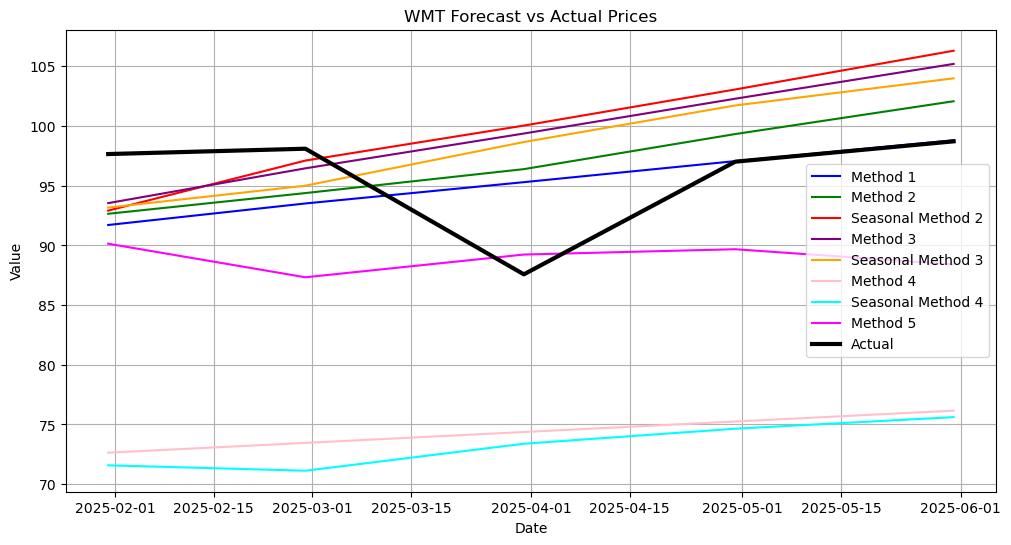

In [55]:
wmt_forecasts = [m1_wmt_forecast, m2_wmt_forecast, sm2_wmt_forecast, 
                 m3_wmt_forecast, sm3_wmt_forecast, m4_wmt_forecast, sm4_wmt_forecast, m5_wmt_forecast]
plot_forecast(wmt_forecasts,curr_wmt_data.head(), 'WMT')

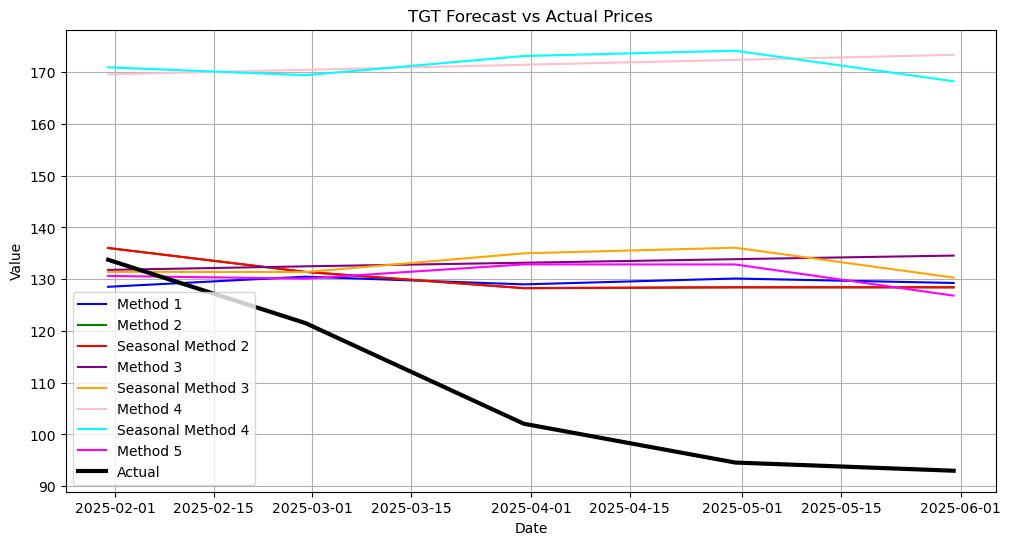

In [56]:
tgt_forecasts = [m1_tgt_forecast, m2_tgt_forecast, sm2_tgt_forecast, 
                 m3_tgt_forecast, sm3_tgt_forecast, m4_tgt_forecast, sm4_tgt_forecast, m5_tgt_forecast]
plot_forecast(tgt_forecasts, curr_tgt_data.head(), 'TGT')

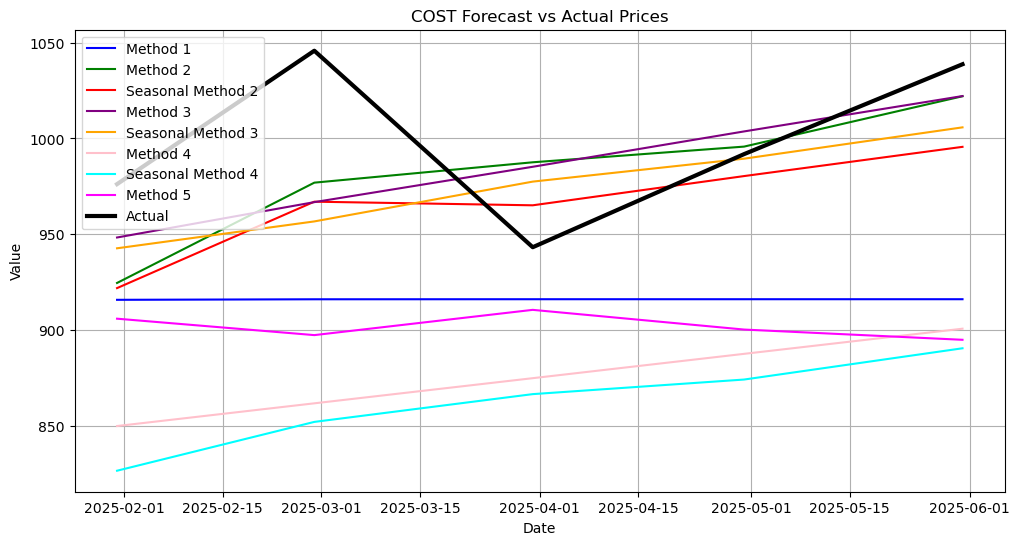

In [57]:
cost_forecasts = [m1_cost_forecast, m2_cost_forecast, sm2_cost_forecast, 
                  m3_cost_forecast, sm3_cost_forecast, m4_cost_forecast, sm4_cost_forecast, m5_cost_forecast]
plot_forecast(cost_forecasts, curr_cost_data.head(), 'COST')

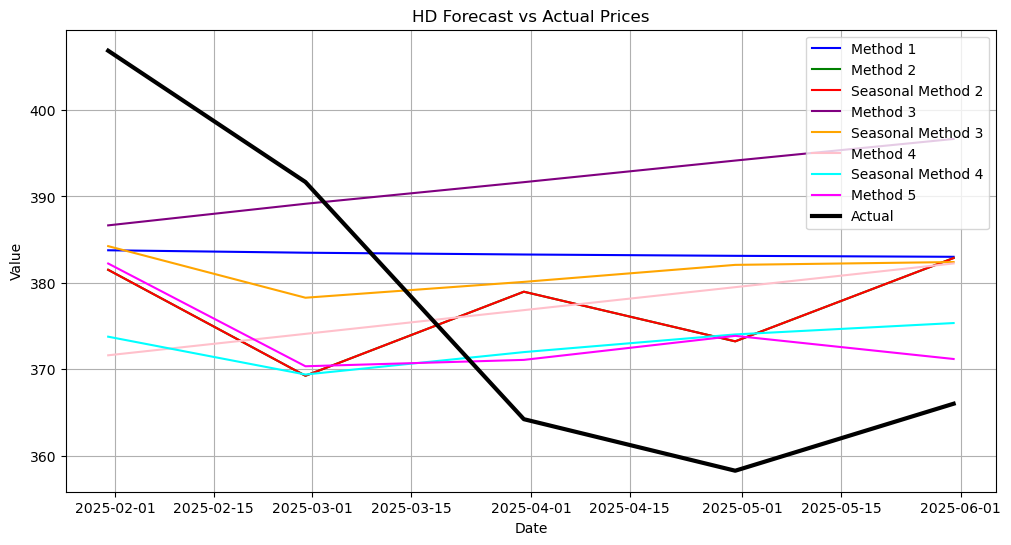

In [58]:
hd_forecasts = [m1_hd_forecast, m2_hd_forecast, sm2_hd_forecast, 
                m3_hd_forecast, sm3_hd_forecast, m4_hd_forecast, sm4_hd_forecast, m5_hd_forecast]
plot_forecast(hd_forecasts, curr_hd_data.head(), 'HD')

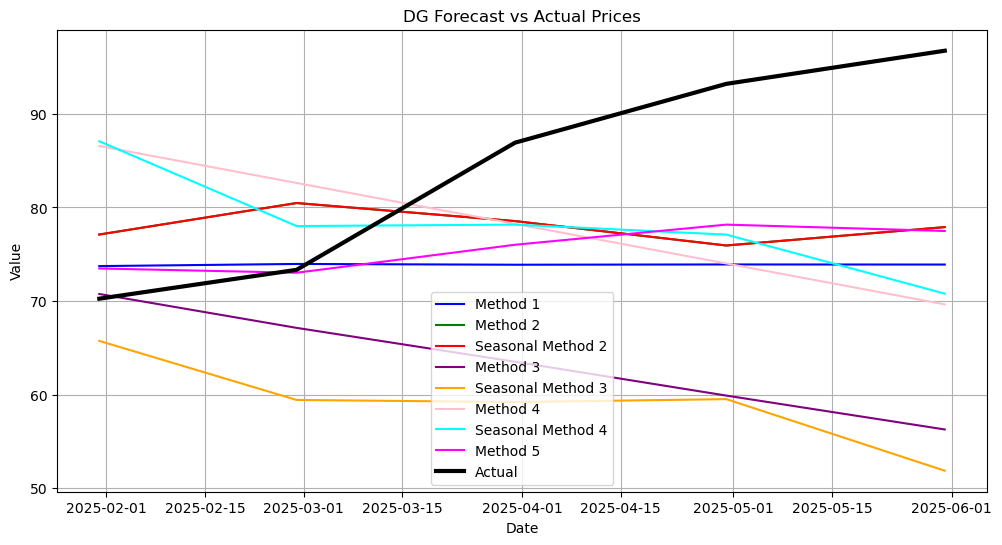

In [59]:
dg_forecasts = [m1_dg_forecast, m2_dg_forecast, sm2_dg_forecast, 
                m3_dg_forecast, sm3_dg_forecast, m4_dg_forecast, sm4_dg_forecast, m5_dg_forecast]
plot_forecast(dg_forecasts, curr_dg_data.head(), 'DG')

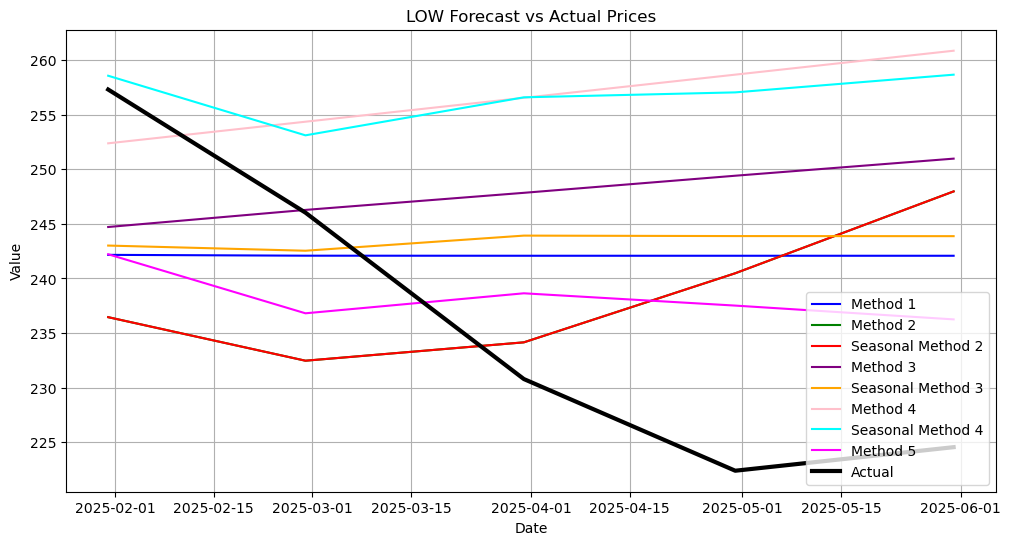

In [60]:
low_forecasts = [m1_low_forecast, m2_low_forecast, sm2_low_forecast, 
                 m3_low_forecast, sm3_low_forecast, m4_low_forecast, sm4_low_forecast, m5_low_forecast]
plot_forecast(low_forecasts, curr_low_data.head(), 'LOW')

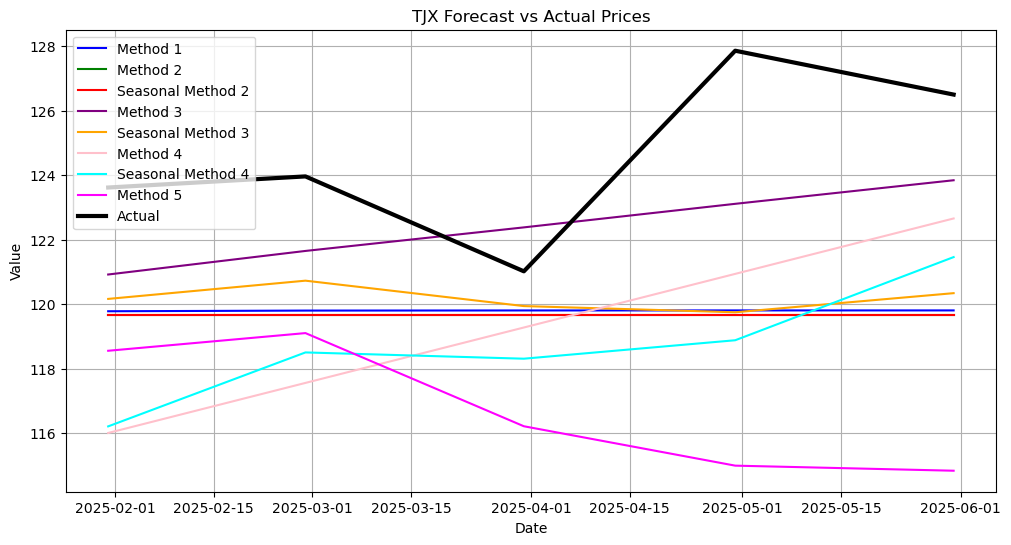

In [61]:
tjx_forecasts = [m1_tjx_forecast, m2_tjx_forecast, sm2_tjx_forecast, 
                 m3_tjx_forecast, sm3_tjx_forecast, m4_tjx_forecast, sm4_tjx_forecast, m5_tjx_forecast]
plot_forecast(tjx_forecasts, curr_tjx_data.head(), 'TJX')

# Calculate the Root Mean Squared Error (RMSE) of Each Method

In [62]:
def calculate_rmse(predicted, actual):
    return np.sqrt(mean_squared_error(actual, predicted))

In [63]:
wmt_rmse = {
    'Method 1': calculate_rmse(m1_wmt_forecast, curr_wmt_data.head()),
    'Method 2': calculate_rmse(m2_wmt_forecast, curr_wmt_data.head()),
    'Seasonal Method 2': calculate_rmse(sm2_wmt_forecast, curr_wmt_data.head()),
    'Method 3': calculate_rmse(m3_wmt_forecast, curr_wmt_data.head()),
    'Seasonal Method 3': calculate_rmse(sm3_wmt_forecast, curr_wmt_data.head()),
    'Method 4': calculate_rmse(m4_wmt_forecast, curr_wmt_data.head()),
    'Seasonal Method 4': calculate_rmse(sm4_wmt_forecast, curr_wmt_data.head()),
    'Method 5': calculate_rmse(m5_wmt_forecast, curr_wmt_data.head())
}
wmt_rmse

{'Method 1': 4.816517756213162,
 'Method 2': 5.160998448931968,
 'Seasonal Method 2': 7.389027350634636,
 'Method 3': 6.762879524850272,
 'Seasonal Method 3': 6.365247961636627,
 'Method 4': 21.86533707707157,
 'Seasonal Method 4': 22.992256395010948,
 'Method 5': 8.188787262522247}

In [64]:
tgt_rmse = {
    'Method 1': calculate_rmse(m1_tgt_forecast, curr_tgt_data.head()),
    'Method 2': calculate_rmse(m2_tgt_forecast, curr_tgt_data.head()),
    'Seasonal Method 2': calculate_rmse(sm2_tgt_forecast, curr_tgt_data.head()),
    'Method 3': calculate_rmse(m3_tgt_forecast, curr_tgt_data.head()),
    'Seasonal Method 3': calculate_rmse(sm3_tgt_forecast, curr_tgt_data.head()),
    'Method 4': calculate_rmse(m4_tgt_forecast, curr_tgt_data.head()),
    'Seasonal Method 4': calculate_rmse(sm4_tgt_forecast, curr_tgt_data.head()),
    'Method 5': calculate_rmse(m5_tgt_forecast, curr_tgt_data.head())
}
tgt_rmse

{'Method 1': 26.119923872904007,
 'Method 2': 25.256995736889213,
 'Seasonal Method 2': 25.256995736889213,
 'Method 3': 29.53395543819672,
 'Seasonal Method 3': 29.325117163817247,
 'Method 4': 64.78782596999409,
 'Seasonal Method 4': 64.3533900055496,
 'Method 5': 26.978433034025244}

In [65]:
cost_rmse = {
    'Method 1': calculate_rmse(m1_cost_forecast, curr_cost_data.head()),
    'Method 2': calculate_rmse(m2_cost_forecast, curr_cost_data.head()),
    'Seasonal Method 2': calculate_rmse(sm2_cost_forecast, curr_cost_data.head()),
    'Method 3': calculate_rmse(m3_cost_forecast, curr_cost_data.head()),
    'Seasonal Method 3': calculate_rmse(sm3_cost_forecast, curr_cost_data.head()),
    'Method 4': calculate_rmse(m4_cost_forecast, curr_cost_data.head()),
    'Seasonal Method 4': calculate_rmse(sm4_cost_forecast, curr_cost_data.head()),
    'Method 5': calculate_rmse(m5_cost_forecast, curr_cost_data.head())
}
cost_rmse

{'Method 1': 91.63785178259816,
 'Method 2': 43.95871124461491,
 'Seasonal Method 2': 48.20942226534444,
 'Method 3': 42.89479239240143,
 'Seasonal Method 3': 47.583564585734116,
 'Method 4': 129.9192297349364,
 'Seasonal Method 4': 142.5480378371005,
 'Method 5': 106.86330156331898}

In [66]:
hd_rmse = {
    'Method 1': calculate_rmse(m1_hd_forecast, curr_hd_data.head()),
    'Method 2': calculate_rmse(m2_hd_forecast, curr_hd_data.head()),
    'Seasonal Method 2': calculate_rmse(sm2_hd_forecast, curr_hd_data.head()),
    'Method 3': calculate_rmse(m3_hd_forecast, curr_hd_data.head()),
    'Seasonal Method 3': calculate_rmse(sm3_hd_forecast, curr_hd_data.head()),
    'Method 4': calculate_rmse(m4_hd_forecast, curr_hd_data.head()),
    'Seasonal Method 4': calculate_rmse(sm4_hd_forecast, curr_hd_data.head()),
    'Method 5': calculate_rmse(m5_hd_forecast, curr_hd_data.head())
}
hd_rmse

{'Method 1': 19.338339880443552,
 'Method 2': 19.341227873708057,
 'Seasonal Method 2': 19.341227873708057,
 'Method 3': 26.04701042476615,
 'Seasonal Method 3': 18.859650073805895,
 'Method 4': 22.016940131205587,
 'Seasonal Method 4': 19.93219792528287,
 'Method 5': 16.599482225340072}

In [67]:
dg_rmse = {
    'Method 1': calculate_rmse(m1_dg_forecast, curr_dg_data.head()),
    'Method 2': calculate_rmse(m2_dg_forecast, curr_dg_data.head()),
    'Seasonal Method 2': calculate_rmse(sm2_dg_forecast, curr_dg_data.head()),
    'Method 3': calculate_rmse(m3_dg_forecast, curr_dg_data.head()),
    'Seasonal Method 3': calculate_rmse(sm3_dg_forecast, curr_dg_data.head()),
    'Method 4': calculate_rmse(m4_dg_forecast, curr_dg_data.head()),
    'Seasonal Method 4': calculate_rmse(sm4_dg_forecast, curr_dg_data.head()),
    'Method 5': calculate_rmse(m5_dg_forecast, curr_dg_data.head())
}
dg_rmse

{'Method 1': 14.684608694517946,
 'Method 2': 12.826568596775664,
 'Seasonal Method 2': 12.826568596775664,
 'Method 3': 25.836481372111198,
 'Seasonal Method 3': 28.75912081210451,
 'Method 4': 17.505274129110894,
 'Seasonal Method 4': 16.224168535674245,
 'Method 5': 12.06325832887981}

In [68]:
low_rmse = {
    'Method 1': calculate_rmse(m1_low_forecast, curr_low_data.head()),
    'Method 2': calculate_rmse(m2_low_forecast, curr_low_data.head()),
    'Seasonal Method 2': calculate_rmse(sm2_low_forecast, curr_low_data.head()),
    'Method 3': calculate_rmse(m3_low_forecast, curr_low_data.head()),
    'Seasonal Method 3': calculate_rmse(sm3_low_forecast, curr_low_data.head()),
    'Method 4': calculate_rmse(m4_low_forecast, curr_low_data.head()),
    'Seasonal Method 4': calculate_rmse(sm4_low_forecast, curr_low_data.head()),
    'Method 5': calculate_rmse(m5_low_forecast, curr_low_data.head())
}
low_rmse

{'Method 1': 14.616935612523163,
 'Method 2': 17.361425320552858,
 'Seasonal Method 2': 17.361425320552858,
 'Method 3': 19.38829426762491,
 'Seasonal Method 3': 15.655250827059131,
 'Method 4': 26.056243063141935,
 'Seasonal Method 4': 24.839164742785297,
 'Method 5': 12.171359065162445}

In [69]:
tjx_rmse = {
    'Method 1': calculate_rmse(m1_tjx_forecast, curr_tjx_data.head()),
    'Method 2': calculate_rmse(m2_tjx_forecast, curr_tjx_data.head()),
    'Seasonal Method 2': calculate_rmse(sm2_tjx_forecast, curr_tjx_data.head()),
    'Method 3': calculate_rmse(m3_tjx_forecast, curr_tjx_data.head()),
    'Seasonal Method 3': calculate_rmse(sm3_tjx_forecast, curr_tjx_data.head()),
    'Method 4': calculate_rmse(m4_tjx_forecast, curr_tjx_data.head()),
    'Seasonal Method 4': calculate_rmse(sm4_tjx_forecast, curr_tjx_data.head()),
    'Method 5': calculate_rmse(m5_tjx_forecast, curr_tjx_data.head())
}
tjx_rmse

{'Method 1': 5.347074415134475,
 'Method 2': 5.462812679021615,
 'Seasonal Method 2': 5.462812679021615,
 'Method 3': 2.9668500768689614,
 'Seasonal Method 3': 5.041225667718249,
 'Method 4': 5.733898450811415,
 'Seasonal Method 4': 6.288389858659168,
 'Method 5': 8.641696870259524}

# Calculate the statisical difference between seasonal vs. non-seasonal

In [70]:
all_rsme=[wmt_rmse, tgt_rmse, cost_rmse, hd_rmse, dg_rmse, low_rmse, tjx_rmse]

In [71]:
method_2_rmse = [rmse['Method 2'] for rmse in all_rsme]
seasonal_method_2_rmse = [rmse['Seasonal Method 2'] for rmse in all_rsme]

differences = np.array(method_2_rmse) - np.array(seasonal_method_2_rmse)
t_stat2, p_value2 = stats.ttest_1samp(differences, 0)
print(f"T-statistic: {t_stat2}")
print(f"P-value: {p_value2}")

T-statistic: -1.453211188650864
P-value: 0.19638505152127106


In [72]:
method_3_rmse = [rmse['Method 3'] for rmse in all_rsme]
seasonal_method_3_rmse = [rmse['Seasonal Method 3'] for rmse in all_rsme]

differences = np.array(method_3_rmse) - np.array(seasonal_method_3_rmse)
t_stat3, p_value3 = stats.ttest_1samp(differences, 0)
print(f"T-statistic: {t_stat3}")
print(f"P-value: {p_value3}")

T-statistic: 0.17033169534540124
P-value: 0.8703477269285702


In [73]:
method_4_rmse = [rmse['Method 4'] for rmse in all_rsme]
seasonal_method_4_rmse = [rmse['Seasonal Method 4'] for rmse in all_rsme]

differences = np.array(method_4_rmse) - np.array(seasonal_method_4_rmse)
t_stat4, p_value4 = stats.ttest_1samp(differences, 0)
print(f"T-statistic: {t_stat4}")
print(f"P-value: {p_value4}")

T-statistic: -0.6879842545365995
P-value: 0.5171629611149087


# Statistics of each method

In [76]:
df_list = [pd.DataFrame([d], index=[name]) for d, name in zip(all_rsme, tickers)]
rmse_table = pd.concat(df_list)
rmse_table

,Method 1,Method 2,Seasonal Method 2,Method 3,Seasonal Method 3,Method 4,Seasonal Method 4,Method 5
WMT,4.816518,5.160998,7.389027,6.762880,6.365248,21.865337,22.992256,8.188787
TGT,26.119924,25.256996,25.256996,29.533955,29.325117,64.787826,64.353390,26.978433
COST,91.637852,43.958711,48.209422,42.894792,47.583565,129.919230,142.548038,106.863302
HD,19.338340,19.341228,19.341228,26.047010,18.859650,22.016940,19.932198,16.599482
DG,14.684609,12.826569,12.826569,25.836481,28.759121,17.505274,16.224169,12.063258
LOW,14.616936,17.361425,17.361425,19.388294,15.655251,26.056243,24.839165,12.171359
TJX,5.347074,5.462813,5.462813,2.966850,5.041226,5.733898,6.288390,8.641697


In [78]:
rmse_table.describe()

,Method 1,Method 2,Seasonal Method 2,Method 3,Seasonal Method 3,Method 4,Seasonal Method 4,Method 5
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,25.223036,18.481249,19.406783,21.918609,21.655597,41.126393,42.453944,27.358045
std,30.225236,13.390852,14.434708,13.697049,14.917521,43.239423,47.767891,35.635433
min,4.816518,5.160998,5.462813,2.966850,5.041226,5.733898,6.288390,8.188787
25%,9.982005,9.144691,10.107798,13.075587,11.010249,19.685306,18.078183,10.352478
50%,14.684609,17.361425,17.361425,25.836481,18.859650,22.016940,22.992256,12.171359
75%,22.729132,22.299112,22.299112,27.790483,29.042119,45.422035,44.596277,21.788958
max,91.637852,43.958711,48.209422,42.894792,47.583565,129.919230,142.548038,106.863302
